In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d kumarajarshi/life-expectancy-who

life-expectancy-who.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip life-expectancy-who

Archive:  life-expectancy-who.zip
replace Life Expectancy Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Life Expectancy Data.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
data=pd.read_csv("/content/Life Expectancy Data.csv")

Data Cleaning

In [ ]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
# Null values
data.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data.dropna(subset=["Life expectancy "],inplace=True)

In [ ]:
def imputer(data):
  for i in data:
    if type(data[i][1]) == np.float64 or type(data[i][1]) == np.int64 :
      data[i].fillna(data[i].mean(),inplace=True)


imputer(data)

In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



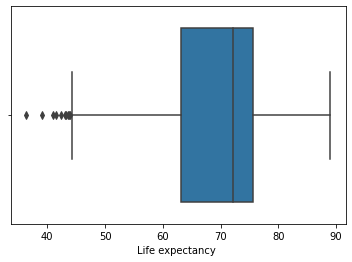

In [ ]:
# outliers
sns.boxplot(data['Life expectancy '])

In [ ]:
q1=data['Life expectancy '].quantile(0.25)
q3=data['Life expectancy '].quantile(0.75)
outer=q3+1*(q3-q1)
lower=q1-1*(q3-q1)
def remove_outlier(x):
  if(x>outer):
    return outer
  elif(x<lower):
    return lower
  return x
data['Life expectancy '].apply(remove_outlier)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    50.5
2934    50.5
2935    50.5
2936    50.5
2937    50.5
Name: Life expectancy , Length: 2928, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



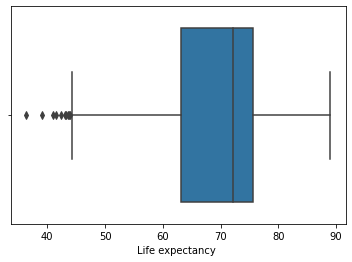

In [ ]:
sns.boxplot(data['Life expectancy '])

Text(0, 0.5, 'Life Expectancy')

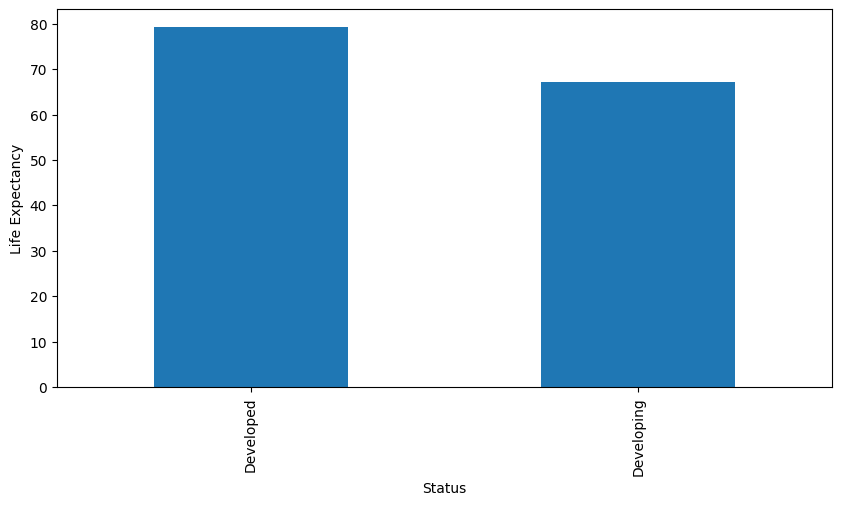

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Status')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



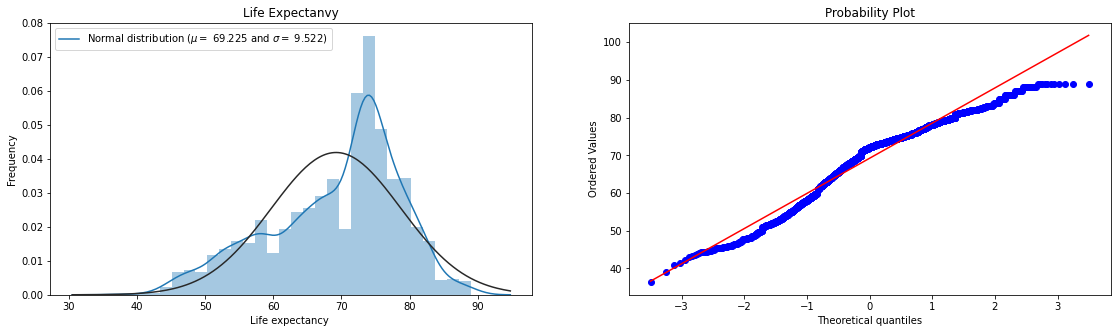

In [ ]:
Life_expectancy=data['Life expectancy ']

(mu, sigma) = norm.fit(Life_expectancy)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(Life_expectancy, fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Life Expectanvy')
ax2 = stats.probplot(Life_expectancy, plot=plt)
f.show()

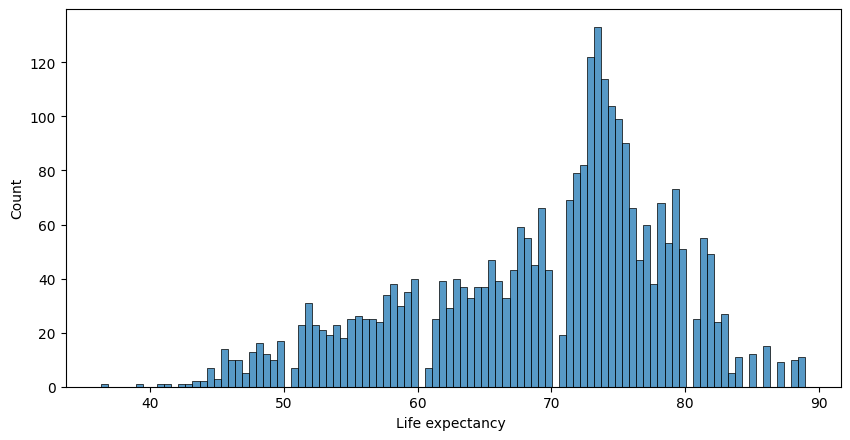

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(data['Life expectancy '],bins=100)

Text(0, 0.5, 'Life Expectancy')

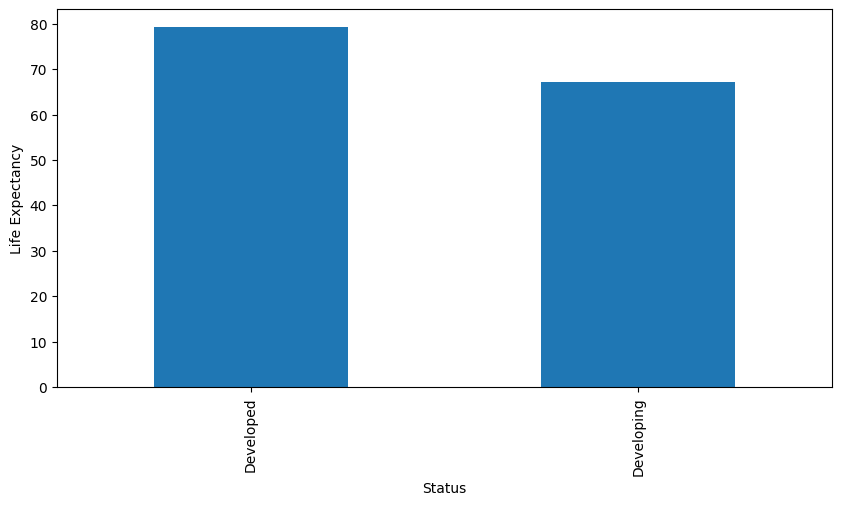

In [ ]:
# healthcare expenditure
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Status')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

Text(0, 0.5, 'Life Expectancy')

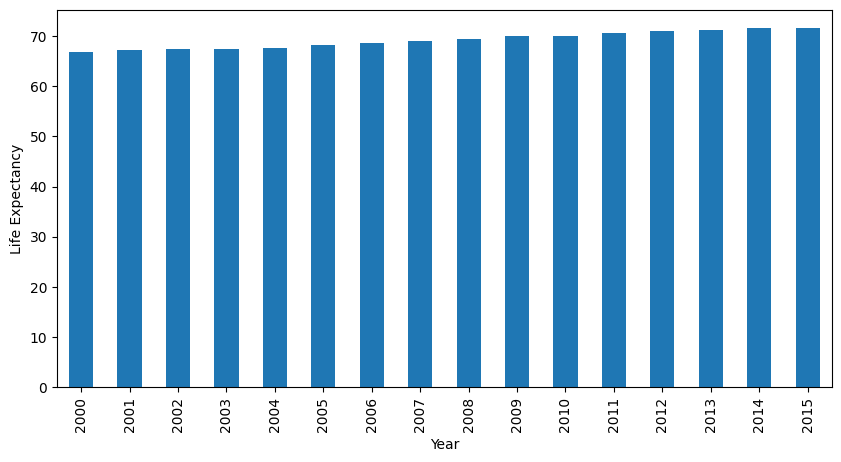

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('Year')['Life expectancy '].mean().plot(kind="bar")
plt.ylabel("Life Expectancy")

In [ ]:
# Country wise life expectancy 
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

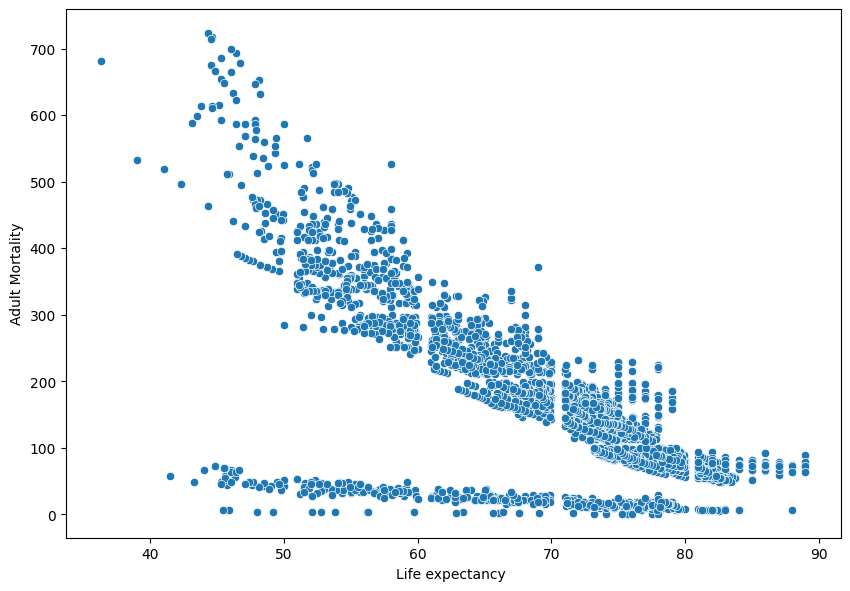

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(data=data,x='Life expectancy ',y='Adult Mortality')
plt.show()

In [ ]:
data1=pd.DataFrame(data.groupby('Country')['Life expectancy '].mean().sort_values())
data1

,Life expectancy
Country,
Sierra Leone,46.11250
Central African Republic,48.51250
Lesotho,48.78125
Angola,49.01875
Malawi,49.89375
...,...
France,82.21875
Switzerland,82.33125
Iceland,82.44375


In [ ]:
# choropleth map
from plotly.offline import iplot
data3 = dict(type='choropleth',
            locations=data1.index,
            locationmode='country names',
            z=data1['Life expectancy '],
            text=data1.index,
            colorbar={'title': 'Life Expectancy'},
            colorscale=[[0, 'rgb(225,255,255)'],
                        [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,125,180)'],
                        [0.03, 'rgb(178,223,138)'], [0.10, 'rgb(51,160,44)'],
                        [0.30, 'rgb(251,144,143)'], [0.70, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)
layout = dict(title="WHO Life expectancy",
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data3], layout=layout)
iplot(choromap, validate=False)

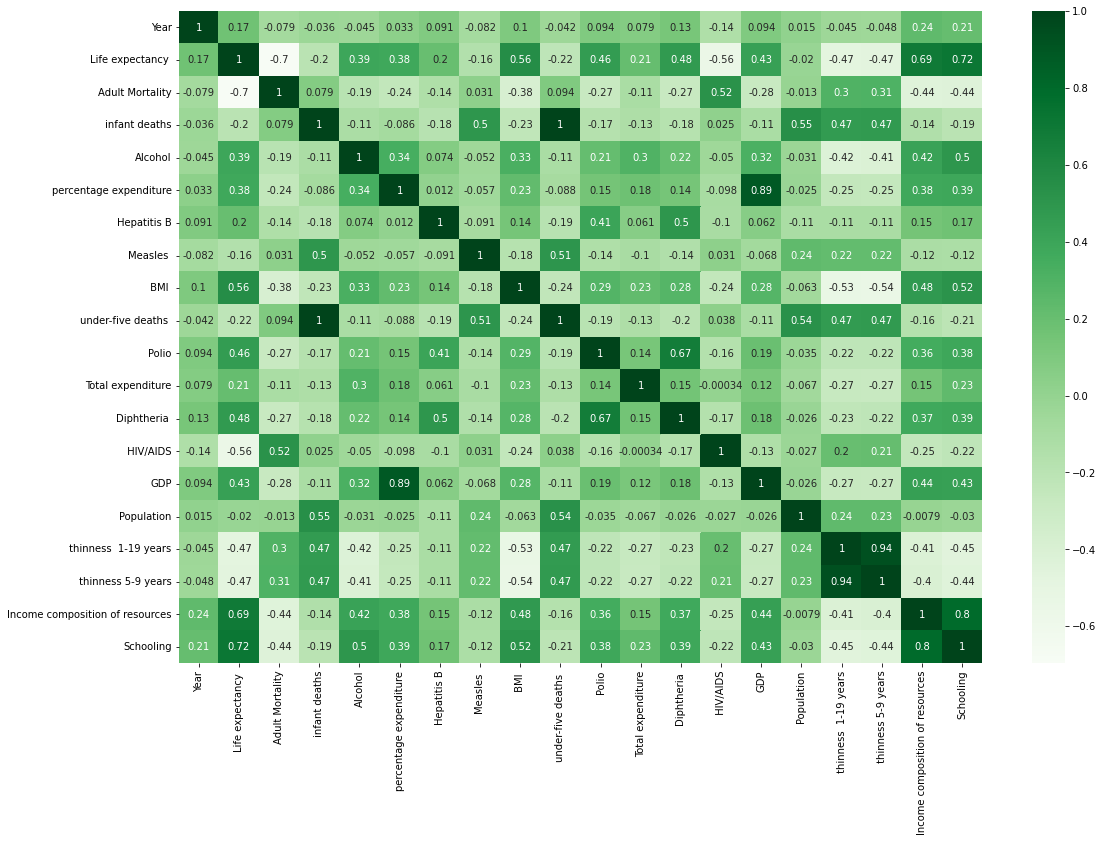

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
# effect of health expenditure on life expectancy
data['percentage expenditure'].corr(data['Life expectancy '])

0.3818635033900498

In [ ]:
# KS test
from scipy.stats import kstest
numerical_data=data.drop(["Life expectancy ","Country","Year"],axis=1)
numerical_data["Status"]=np.where(numerical_data["Status"]=="Developing",0,1)

for i in numerical_data:
  print("result for {} column is {}".format(i,kstest(numerical_data[i],'norm')))

result for Status column is KstestResult(statistic=0.5, pvalue=0.0)
result for Adult Mortality column is KstestResult(statistic=0.9918195008754738, pvalue=0.0)
result for infant deaths column is KstestResult(statistic=0.5742444035709464, pvalue=0.0)
result for Alcohol column is KstestResult(statistic=0.6414334841157909, pvalue=0.0)
result for percentage expenditure column is KstestResult(statistic=0.7668396579846813, pvalue=0.0)
result for Hepatitis B column is KstestResult(statistic=0.9982606784849428, pvalue=0.0)
result for Measles  column is KstestResult(statistic=0.6094219991993618, pvalue=0.0)
result for  BMI  column is KstestResult(statistic=0.9811537226523659, pvalue=0.0)
result for under-five deaths  column is KstestResult(statistic=0.5892717259753181, pvalue=0.0)
result for Polio column is KstestResult(statistic=0.9986501019683699, pvalue=0.0)
result for Total expenditure column is KstestResult(statistic=0.9314259391010011, pvalue=0.0)
result for Diphtheria  column is KstestRe

In [ ]:
import statsmodels.api as sm
Y=Life_expectancy
x=numerical_data
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())
# From the P values obtained we can drop 3 columns= Population,thinness 5-9 years,percentage expenditure

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     699.1
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -8239.7
No. Observations:                2928   AIC:                         1.652e+04
Df Residuals:                    2908   BIC:                         1.664e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
numerical_data2=numerical_data.drop(['Population',' thinness 5-9 years','percentage expenditure'],axis=1)
Y=Life_expectancy
x=numerical_data2
x=sm.add_constant(x)
model=sm.OLS(Y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     830.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:11:46   Log-Likelihood:                -8240.3
No. Observations:                2928   AIC:                         1.651e+04
Df Residuals:                    2911   BIC:                         1.662e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



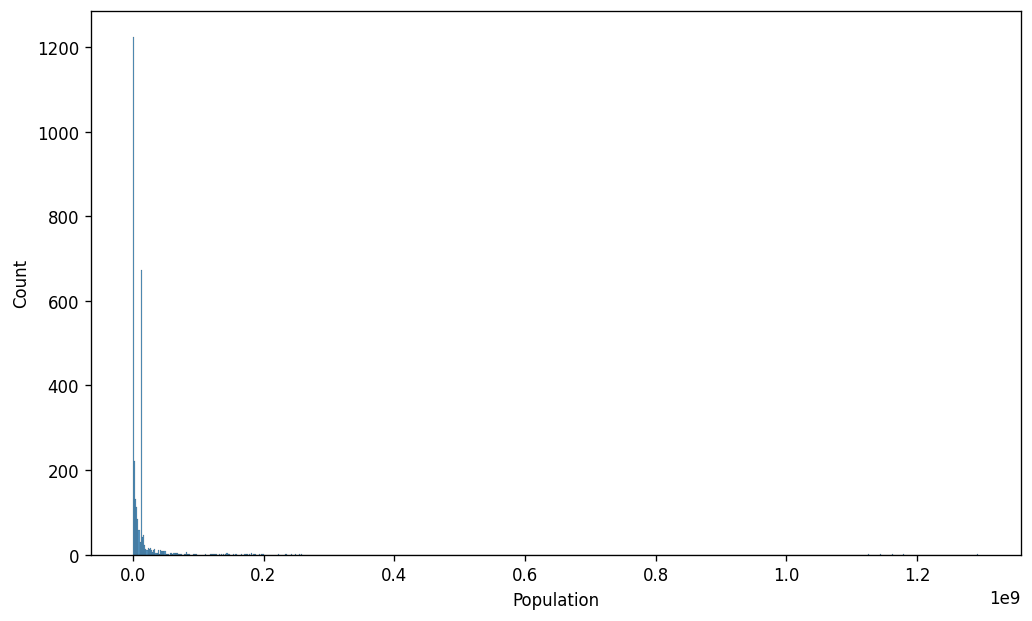

In [ ]:
# Indentifying distribution for the columns removed
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data['Population'])

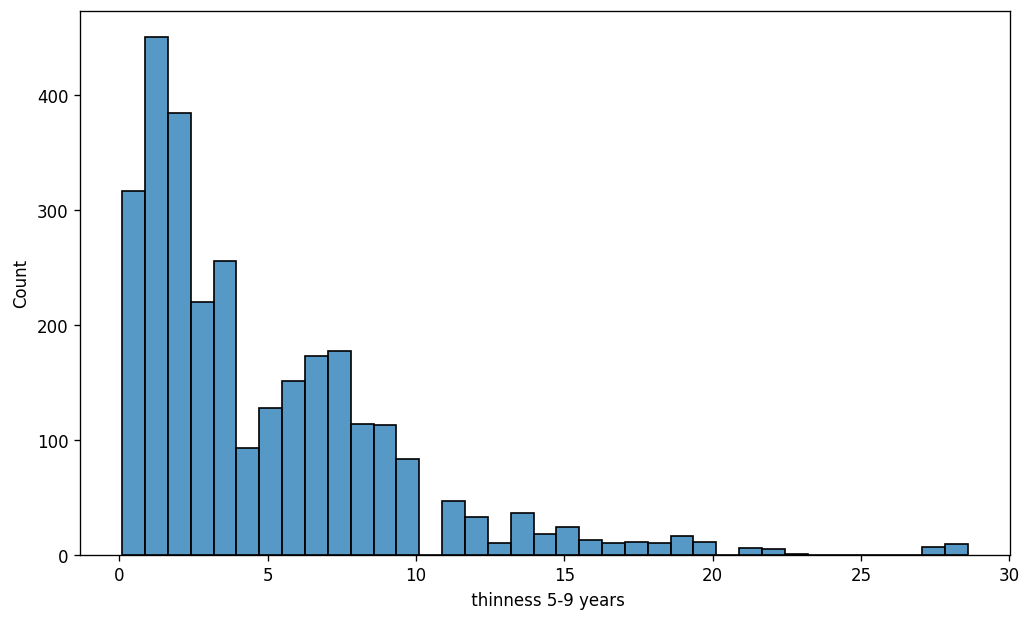

In [ ]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data[' thinness 5-9 years'])

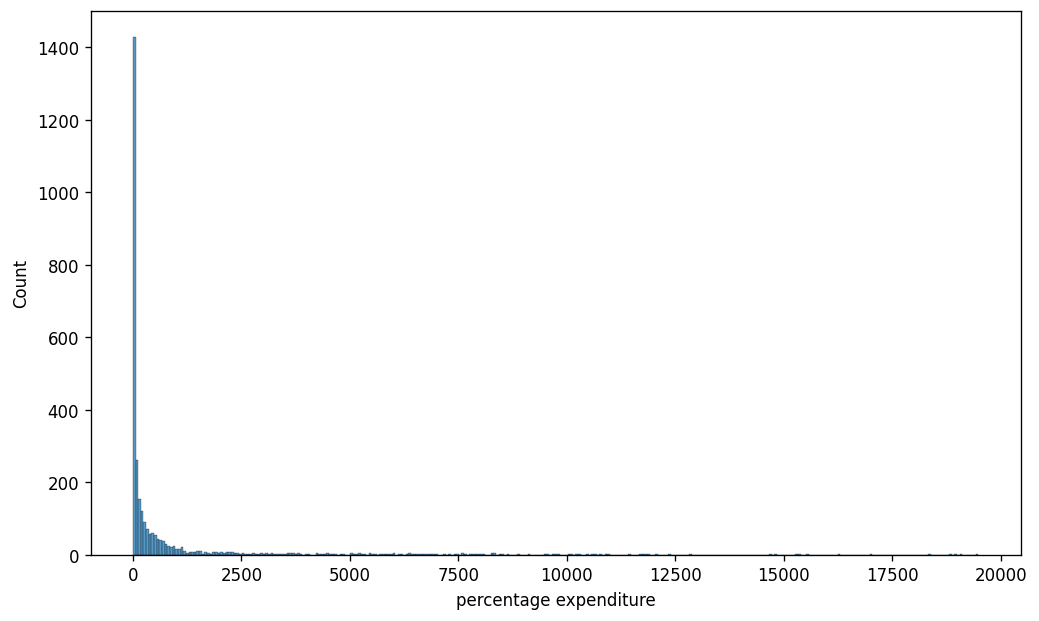

In [ ]:
plt.figure(figsize=(10,6),dpi=120)
sns.histplot(numerical_data['percentage expenditure'])

In [ ]:
def mean(data):
  n = len(data)
  mean = sum(data) / n
  return mean
 
def variance(data):
  n = len(data)
  mean = sum(data) / n
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  return variance

def standardize(x,mean , std):
  return (x - mean)/std

def scale(x,x_min,x_max):
  return (x - x_min) / (x_max - x_min)


  
for j in numerical_data2:
  if(j!='Status'):
    x_min = min(numerical_data2[j])
    x_max = max(numerical_data2[j])
    numerical_data2[j] = numerical_data2[j].apply(scale,args = (x_min,x_max))



In [ ]:
numerical_data2.head()

,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,0,0.362881,0.034444,0.0,0.653061,0.005439,0.236292,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.619565,0.505274,0.487923
1,0,0.373961,0.035556,0.0,0.622449,0.002319,0.229765,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.630435,0.502110,0.483092
2,0,0.369806,0.036667,0.0,0.642857,0.002027,0.223238,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.637681,0.495781,0.478261
3,0,0.375346,0.038333,0.0,0.673469,0.013135,0.216710,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.644928,0.488397,0.473430
4,0,0.379501,0.039444,0.0,0.683673,0.014200,0.211488,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.655797,0.478903,0.458937


In [ ]:
list1=[data["Country"],data["Year"],numerical_data2]
data_scaled=pd.concat(list1,axis=1)
data_scaled.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,0.362881,0.034444,0.0,0.653061,0.005439,0.236292,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.619565,0.505274,0.487923
1,Afghanistan,2014,0,0.373961,0.035556,0.0,0.622449,0.002319,0.229765,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.630435,0.502110,0.483092
2,Afghanistan,2013,0,0.369806,0.036667,0.0,0.642857,0.002027,0.223238,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.637681,0.495781,0.478261
3,Afghanistan,2012,0,0.375346,0.038333,0.0,0.673469,0.013135,0.216710,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.644928,0.488397,0.473430
4,Afghanistan,2011,0,0.379501,0.039444,0.0,0.683673,0.014200,0.211488,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.655797,0.478903,0.458937


In [ ]:
one_hot_data=pd.get_dummies(data_scaled,columns=["Country"])
one_hot_data.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,0,0.362881,0.034444,0.0,0.653061,0.005439,0.236292,0.0332,0.031250,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,0.373961,0.035556,0.0,0.622449,0.002319,0.229765,0.0344,0.572917,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,0.369806,0.036667,0.0,0.642857,0.002027,0.223238,0.0356,0.614583,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,0.375346,0.038333,0.0,0.673469,0.013135,0.216710,0.0372,0.666667,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,0.379501,0.039444,0.0,0.683673,0.014200,0.211488,0.0388,0.677083,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
k =10
def cross(data,k,v):
  size = data.shape[0] // k
  d = []
  for i in range(k-1):
    d.append(data[i*size : (i+1)*size])
  d.append(data[(k-1)*size:])
  test = d.pop(v)
  train = pd.concat(d)
  return train,test

for i in range(k):
  t1,t2 = cross(train,k,i)
  print(t2.head())

       Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0               71.279624         65.0      1154   19.1  ...    6.0   
1               73.523582         62.0       492   18.6  ...   58.0   
2               73.219243         64.0       430   18.1  ...   62.0   
3               78.184215         67.0      2787   17.6  ...   67.0   
4                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0     

In [ ]:
# Lasso

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')